In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [8]:
def f(x, phi0, phi1):
    y  = phi0 + phi1 * x
    return y

def plot(x, y, phi0, phi1):
    plt.scatter(x, y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'-b', lw=2)

    plt.show()

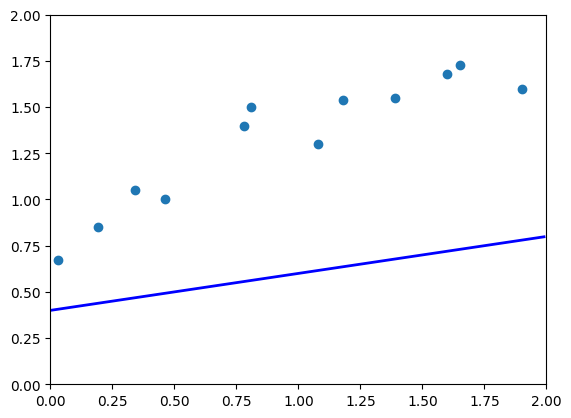

In [ ]:
phi0 = 0.4
phi1 = 0.2
plot(x, y, phi0, phi1)

In [13]:
def compute_loss(x, y, phi0, phi1):
    # sum_loss = 0 
    # for i, num in enumerate(x): 
    #     loss = ((phi0 + x[i]*phi1) - y[i])**2 
    #     sum_loss += loss 
    #     return sum_loss

    loss = np.sum(phi0 + phi1 * x - y)
    return loss

In [15]:
loss = compute_loss(x, y, phi0, phi1)
print(loss)

-8.788


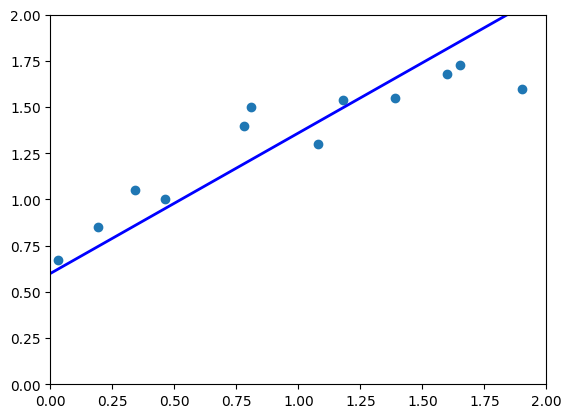

0.00160000000000049


In [30]:
phi0 = 0.60
phi1 = 0.76
plot(x, y, phi0, phi1)
loss = compute_loss(x, y, phi0, phi1)
print(loss)

In [ ]:
# def optimal_phi(phi0, phi1, x, y, step = 0.01,n_iter = 100):
#     loss = compute_loss(x, y, phi0, phi1)
#     for _ in range(n_iter):
#         for direction in range(-1,2):
#             new_phi0 = phi0 + direction * step 
#             new_loss = compute_loss(x, y, new_phi0, phi1)
#             if new_loss < loss:
#                 loss = new_loss
#                 phi0 = new_phi0

#         for direction in range(-1,2):
#             new_phi1 = phi1 + direction * step
#             new_loss = compute_loss(x, y, phi0, new_phi1)
#             if new_loss < loss:
#                 loss = new_loss
#                 phi1 = new_phi1

#     return phi0, phi1, loss

### Co-ordinate Descent, Performs terribly

In [71]:
def optimize_phi(x, y, phi0, phi1, n_iter):
    loss = compute_loss(x, y, phi0, phi1)
    for _ in range(n_iter):
        for direction in range(-1,2):
            new_phi0 = phi0 + direction
            new_loss =compute_loss(x, y, new_phi0, phi1)
            if new_loss < loss:
                loss = new_loss
                phi0 = new_phi0

        for direction in range(-1,2):
            new_phi1 = phi1 + direction
            new_loss = compute_loss(x, y, phi0, new_phi1)
            if new_loss < loss:
                loss = new_loss
                phi1 = new_phi1

    return phi0, phi1, loss

In [72]:
phia, phib, loss = optimize_phi(x, y, 1.60, -0.8, 10)
print(phia, phib, loss)

-8.4 -10.8 -239.898


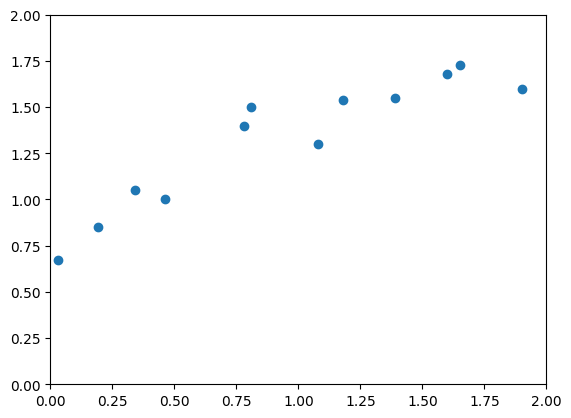

In [73]:
plot(x, y, phia, phib)

In [74]:
#derivatives of the lossfunction

loss_function = np.sum((phi0 + phi1 *x - y)**2)

#derivative of loss function wrt phi0

derivative_0 = np.sum(2*(phi0 + phi1*x - y))

#derivative of loss function wrt phi1

derivative_1 = np.sum(2*(phi0 + phi1*x - y)*x)

In [81]:
def gradient_descent(x,y, phi0, phi1, n_iter, learning_rate):
    for _ in range(n_iter):
        phi0 = phi0 - learning_rate*(sum(2.0*(phi0 +phi1 * xi - yi) for xi,yi in zip(x,y)))
        phi1 = phi1 - learning_rate*(sum(2.0*(phi0 + phi1 * xi - yi)*xi for xi, yi in zip(x,y)))
    loss = compute_loss(x, y, phi0, phi1)
    return phi0, phi1, loss

In [82]:
phi0, phi1, loss = gradient_descent(x, y, phi0, phi1, 1000, 0.01)
print(phi0, phi1, loss)

0.8259500451387278 0.5222260699680337 -1.9984014443252818e-15


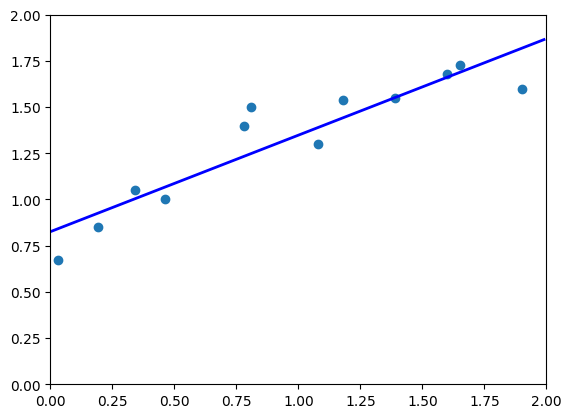

In [83]:
plot(x, y, phi0, phi1)